# Performing a Regression Analysis

## Table of Contents
* [01. Importing Libraries and Data](#01.-Importing-Libraries-and-Data)
* [02. Viewing Data and its Statistics](#02.-Viewing-Data-and-its-Statistics)
* [03. Prepping Data for Regression](#03.-Prepping-Data-for-Regression)
* [04. Regression Analysis for Test Set](#04.-Regression-Analysis-for-Test-Set)
* [05. Regression Analysis for Training Set](#05.-Regression-Analysis-for-Training-Set)

# 01. Importing Libraries and Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import data 
df_regress = pd.read_pickle(r'/Users/suzandiab/Documents/Cost of Living/02 Data/Prepared Data/df_map.pkl')

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# 02. Viewing Data and its Statistics

In [4]:
# Clean data 
df_regress.columns

Index(['case_id', 'state', 'metropolitan_area', 'county',
       'family_member_count', 'annual_housing_cost', 'annual_food_cost',
       'annual_transportation_cost', 'annual_healthcare_cost',
       'annual_other_necessities_cost', 'annual_childcare_cost',
       'annual_taxes', 'annual_total_cost', 'median_family_income',
       'parent_status', 'number_of_dependents', 'income_level'],
      dtype='object')

In [5]:
# Viewing df
df_regress.head()

,case_id,state,metropolitan_area,county,family_member_count,annual_housing_cost,annual_food_cost,annual_transportation_cost,annual_healthcare_cost,annual_other_necessities_cost,annual_childcare_cost,annual_taxes,annual_total_cost,median_family_income,parent_status,number_of_dependents,income_level
0,1,Alabama,True,Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.41406,single parent,0.0,Average Income
1,1,Alabama,True,Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.41406,single parent,1.0,Average Income
2,1,Alabama,True,Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.41406,single parent,2.0,Average Income
3,1,Alabama,True,Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.41406,single parent,3.0,Average Income
4,1,Alabama,True,Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.41406,single parent,4.0,Average Income


In [6]:
# Dimensions
df_regress.shape

(31016, 17)

In [7]:
# Check for missing values

df_regress.isnull().sum()

case_id                          0
state                            0
metropolitan_area                0
county                           0
family_member_count              0
annual_housing_cost              0
annual_food_cost                 0
annual_transportation_cost       0
annual_healthcare_cost           0
annual_other_necessities_cost    0
annual_childcare_cost            0
annual_taxes                     0
annual_total_cost                0
median_family_income             0
parent_status                    0
number_of_dependents             0
income_level                     0
dtype: int64

In [8]:
# Checking for duplicates 
df_regress.duplicated().any()

False

/var/folders/4p/ym48tzyj1vv3lyzdlk4g93jh0000gn/T/ipykernel_32520/1171337798.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_regress['annual_other_necessities_cost'], bins=25)
/Users/suzandiab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='annual_other_necessities_cost', ylabel='Density'>

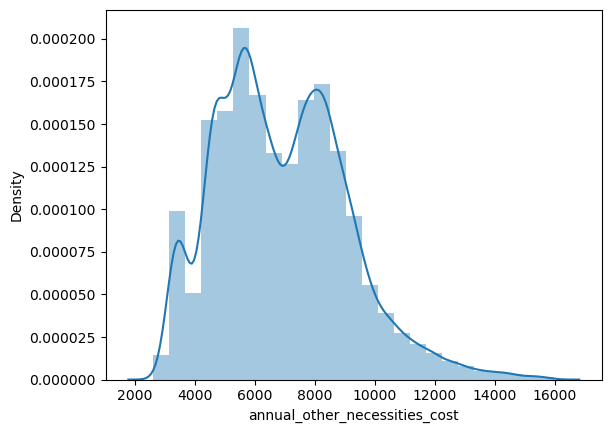

In [11]:
# Checking for extreme values 
sns.distplot(df_regress['annual_other_necessities_cost'], bins=25)

In [13]:
# Check mean
df_regress['annual_other_necessities_cost'].mean()

6912.540025457828

In [14]:
# Check median
df_regress['annual_other_necessities_cost'].median()

6686.049660000001

In [15]:
# Check max
df_regress['annual_other_necessities_cost'].max()

15993.5376

# 03. Prepping Data for Regression

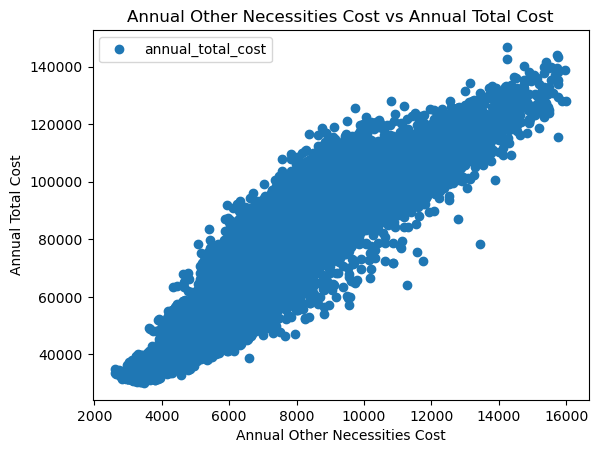

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_regress.plot(x = 'annual_other_necessities_cost', y='annual_total_cost',style='o') 
plt.title('Annual Other Necessities Cost vs Annual Total Cost')  
plt.ylabel('Annual Total Cost')  
plt.xlabel('Annual Other Necessities Cost')  
plt.show()

If a household pays more for other necessities, then they will subsequently pay more in total.

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_regress['annual_other_necessities_cost'].values.reshape(-1,1)
y = df_regress['annual_total_cost'].values.reshape(-1,1)

In [18]:
X

array([[ 4333.81344],
       [ 6217.45896],
       [ 7075.65816],
       ...,
       [ 7402.72416],
       [ 9130.76148],
       [10068.61968]])

In [19]:
y

array([[ 39254.0532],
       [ 57194.3256],
       [ 76141.0308],
       ...,
       [ 96413.1684],
       [113294.226 ],
       [120534.576 ]])

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
# Create a regression object.

regression = LinearRegression()  

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

# 04. Regression Analysis for Test Set

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

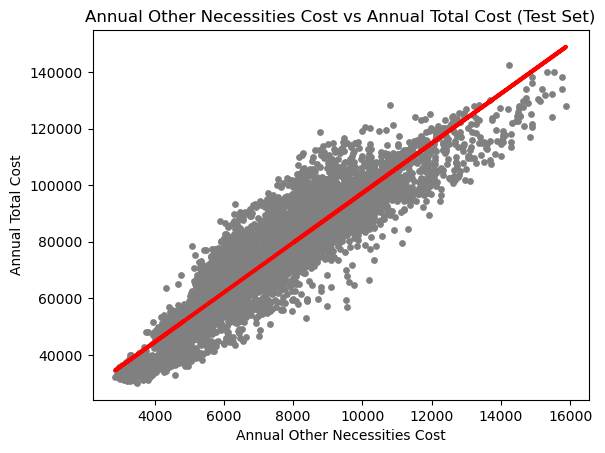

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
bar1 = plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Annual Other Necessities Cost vs Annual Total Cost (Test Set)')
plot_test.ylabel('Annual Total Cost')
plot_test.xlabel('Annual Other Necessities Cost')
plot_test.show()

line seems to fit the data pretty well. most of the points are near the line.

In [35]:
bar1.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/regressiontotal.png', bbox_inches='tight')

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [27]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8.77993613]]
Mean squared error:  54141650.5268776
R2 score:  0.8707943152983681


In [28]:
y_predicted

array([[ 80117.66679762],
       [103432.26285017],
       [ 50184.90625719],
       ...,
       [ 59961.31912987],
       [119027.43861571],
       [ 51596.65782477]])

In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,82171.0308,80117.666798
1,97923.5388,103432.262850
2,44885.1264,50184.906257
3,78799.0896,68418.863028
4,81093.6852,84828.120091
5,63338.3844,59801.984361
6,61074.2520,60558.233975
7,32140.4820,34470.975885
8,103765.2072,102222.045585
9,108011.9880,95097.906021


predicted values and actual y values are not far off from each other.

# 05. Regression Analysis for Training Set

In [30]:
# Predict.

y_predicted_train = regression.predict(X_train) 

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8.77993613]]
Mean squared error:  54954915.0789525
R2 score:  0.8717285346237593


model fits the training set only slightly better than the test set. did not overfit model.

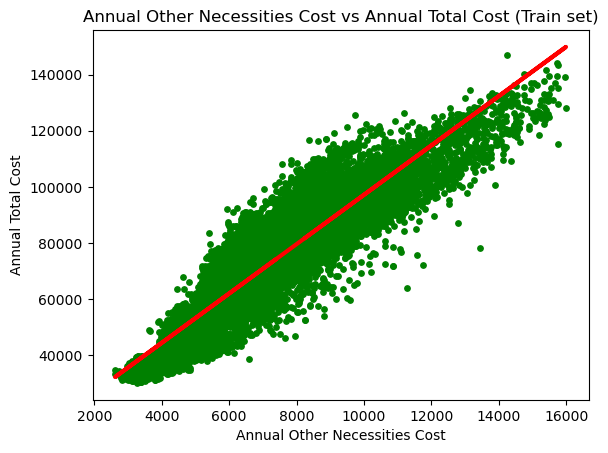

In [33]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Annual Other Necessities Cost vs Annual Total Cost (Train set)')
plot_test.ylabel('Annual Total Cost')
plot_test.xlabel('Annual Other Necessities Cost')
plot_test.show()